In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Merge 12 months of sales data into a single csv file 

In [3]:
files =[file for file in os.listdir("/content/drive/MyDrive/datasets/Sales_Data")]
for file in files:
    print(file)

Sales_August_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_December_2019.csv
Sales_September_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_March_2019.csv
Sales_July_2019.csv
all_data.csv


In [4]:
path = "/content/drive/MyDrive/datasets/Sales_Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(373700, 6)

##### convert it into dataset

In [5]:
all_data.to_csv('/content/drive/MyDrive/datasets/Sales_Data/all_data.csv',index=False)

##### Data cleaning and formatting

In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [8]:
all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [9]:
all_data = all_data.dropna(how='all')
all_data.shape

(372610, 6)

### EDA

In [10]:
def month(x):
    return x.split('/')[0]

##### add month col

In [11]:
all_data['Month']=all_data['Order Date'].apply(month)

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [13]:
all_data['Month'].unique()

array(['08', 'Order Date', '09', '02', '03', '04', '05', '12', '01', '10',
       '06', '07', '11'], dtype=object)

In [14]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

371900

In [15]:
all_data=all_data[~filter]

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [17]:
all_data['Month']=all_data['Month'].astype(int)

In [18]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [19]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [20]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [21]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [22]:
all_data.groupby('Month')['sales'].sum()

Month
1     3.644513e+06
2     4.404045e+06
3     5.614201e+06
4     6.781340e+06
5     6.305214e+06
6     5.155605e+06
7     5.295552e+06
8     4.488936e+06
9     4.195120e+06
10    7.473454e+06
11    6.399206e+06
12    9.226887e+06
Name: sales, dtype: float64

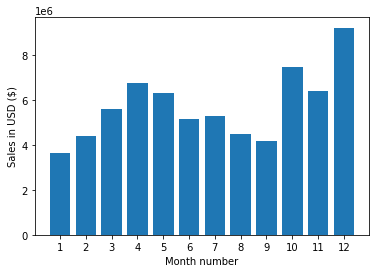

In [23]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### The above graph shows that the month December has the most sales followed by October.

In [24]:
def city(x):
    return x.split(',')[1]

In [25]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [26]:
all_data.groupby('city')['city'].count()

city
 Atlanta          29762
 Austin           19810
 Boston           39868
 Dallas           29640
 Los Angeles      59210
 New York City    49752
 Portland         24930
 San Francisco    89464
 Seattle          29464
Name: city, dtype: int64

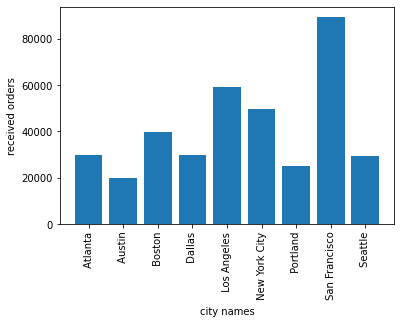

In [27]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

#### The above graph shows that San Francisco has the highest number of orders.

In [28]:
all_data['Order Date'][0].dtype

dtype('O')

In [29]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [30]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

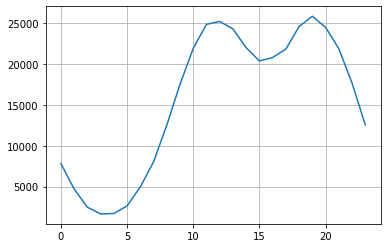

In [31]:
plt.grid()
plt.plot(keys,hour)

#### Most orders were placed on two times. Once in between 11hrs(11AM) and 12hrs(12noon) and in between 18hrs(6pm) and 20hrs(8pm).

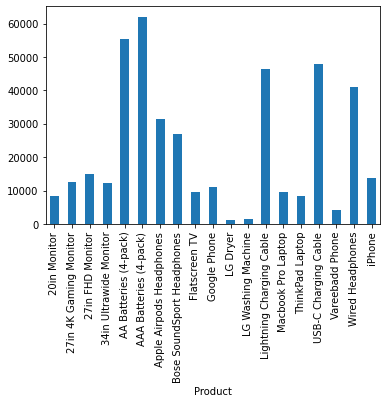

In [32]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

AAAA batteries (4-pack) were sold the most.

In [33]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [34]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

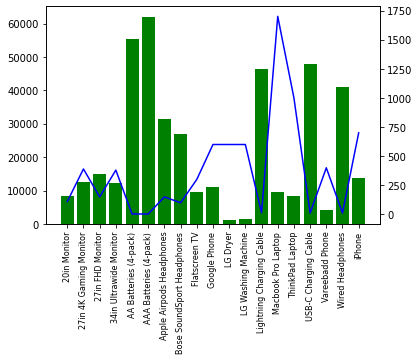

In [35]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

#### The quantity of selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [36]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19
5,236675,Wired Headphones,1,11.99,08/02/19 23:54,"470 Hill St, San Francisco, CA 94016",8,11.99,San Francisco,23
6,236676,34in Ultrawide Monitor,1,379.99,08/04/19 19:52,"470 Cherry St, Los Angeles, CA 90001",8,379.99,Los Angeles,19
7,236677,20in Monitor,1,109.99,08/13/19 07:16,"918 6th St, San Francisco, CA 94016",8,109.99,San Francisco,7
8,236678,Wired Headphones,1,11.99,08/25/19 20:11,"58 9th St, San Francisco, CA 94016",8,11.99,San Francisco,20
9,236679,Macbook Pro Laptop,1,1700.00,08/07/19 15:43,"239 Spruce St, Los Angeles, CA 90001",8,1700.00,Los Angeles,15


In [37]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22,"Wired Headphones,Wired Headphones"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14,"iPhone,iPhone"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20,"AA Batteries (4-pack),AA Batteries (4-pack)"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19,"AA Batteries (4-pack),AA Batteries (4-pack)"


In [39]:
#lets drop all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

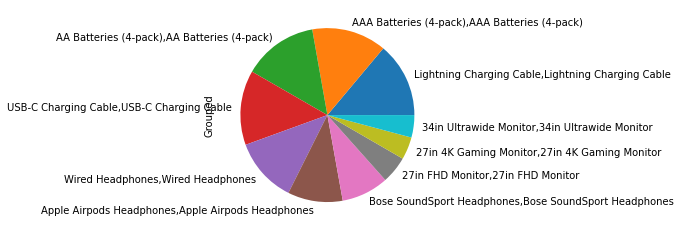

In [40]:
df2['Grouped'].value_counts()[0:10].plot.pie()

#### The above chart shows that Iphone and lightning charging cable are ordered collectively. And google phone and USB-C charging cable is ordered together. 

##### This can be helpful in recommender systems in a way that when someone adds Iphone/google phone in their shopping cart, the recommender system can show them the product of lightning charging cable/USB-C charging cable.